# Question 1

We have a random number generator drawing samples from a Gaussian distribution with unknown variance. Let probability of drawing a value $x$ be:

$$
P(x|a) = N(a) e^{-\frac{x^2}{2a}}
$$

where $N(a)$ is a normalization which is a function of the variance $a$. We would like to compute this. The posterior distribution is a bona fide probability distribution and thus must integrate to 1. Hence:

$$
1 = N(a) \int_{-\infty}^{\infty} e^{-\frac{x^2}{2a}} dx
$$

The integral is a Gaussian which evaluates to $\sqrt{2 \pi a}$. Hence we find that the normalization is:

$$
N(a) = \frac{1}{\sqrt{2 \pi a}}
$$

yielding

$$
P(x|a) = \frac{1}{\sqrt{2 \pi a}} \exp{\left( -\frac{x^2}{2a} \right)}
$$

# Question 2

Bayes' Theorem tells us that

$$
P(a|{x}) \propto P(\{x\}|a)P(a)
$$

The likelihood is the product of individual probabilities since we are treating each draw as independent. Hence for $\{x\} = \{x_1, ... x_N\}$ we have

$$
P(\{x\}|a) = \left(\frac{1}{\sqrt{2 \pi a}}\right)^N \exp{\left(-\frac{\sum_i x_i^2}{2a}\right)}
$$

Here we will adopt a uniform prior for $a$, with


\begin{equation*}
P(a) = \left\{
        \begin{array}{ll}
            const. & \quad a > 0 \\
            0 & \quad a \leq 0
        \end{array}
    \right.
\end{equation*}

Putting this all together, the posterior distribution on $a$ is 

\begin{equation*}
P(a|\{x\}) \propto \left\{
        \begin{array}{ll}
             \left(\frac{1}{\sqrt{2 \pi a}}\right)^N \exp{\left(-\frac{\sum_i x_i^2}{2a}\right)} & \quad a > 0 \\
            0 & \quad a \leq 0
        \end{array}
    \right.
\end{equation*}

# Question 3

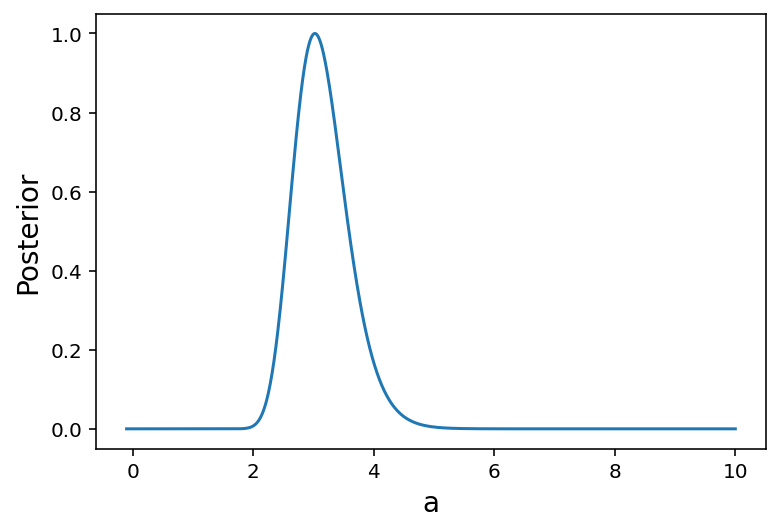

In [42]:
import numpy as np 
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

def loglike(a, data):
    coeff = 1./(np.sqrt(2*np.pi*a))
    N = len(data)
    return N*np.log(coeff) - np.sum(data**2)/(2*a)

def posterior(a, data):
    '''
    Returns the posterior distribution for the variance a.
    Inputs are a grid of a values and data
    '''
    result = 0
    if(a>0):
        like = np.exp(loglike(a,data))
        result = like
    return result

true_a = 3.0

N_samp=100

samples = np.random.normal(loc=0.0, scale=np.sqrt(true_a), size=N_samp)

a_grid = np.linspace(-.1, 10, 1000)

post = np.array([posterior(a,samples) for a in a_grid])

fig,ax=plt.subplots()

ax.plot(a_grid, post/np.max(post))
ax.set_xlabel("a", fontsize=14)
ax.set_ylabel("Posterior", fontsize=14)

plt.show()


# Question 5 & 6

/var/folders/dx/56r119096g71nr7d270292b80000gn/T/ipykernel_314/1622239805.py:7: RuntimeWarning: invalid value encountered in sqrt
  coeff = 1./(np.sqrt(2*np.pi*a))


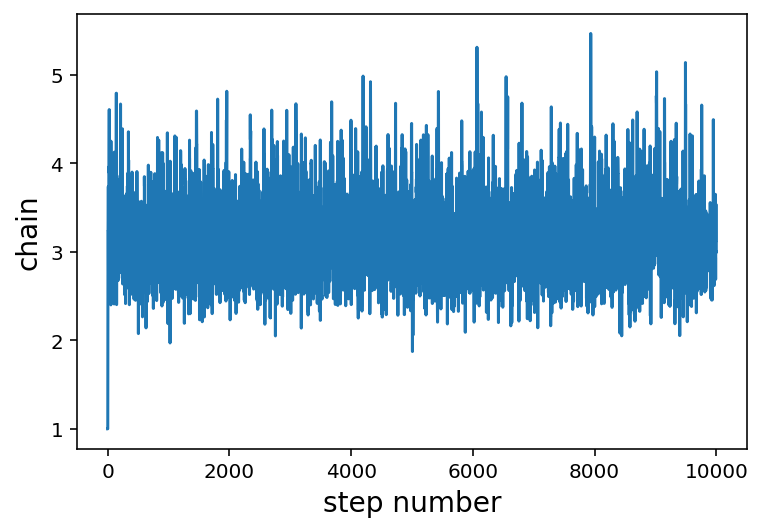

In [43]:
from MarkovChain import MarkovChain

def likelihood_wrapped(a):
    return loglike(a, samples)

mc = MarkovChain(likelihood_wrapped, 1., g_sigma=1.)

mc.run_chain(10000)

x, y = mc.get_trace()

fig,ax = plt.subplots()

ax.plot(x, y)
ax.set_xlabel("step number", fontsize=14)
ax.set_ylabel("chain", fontsize=14)
plt.show()

# Question 7

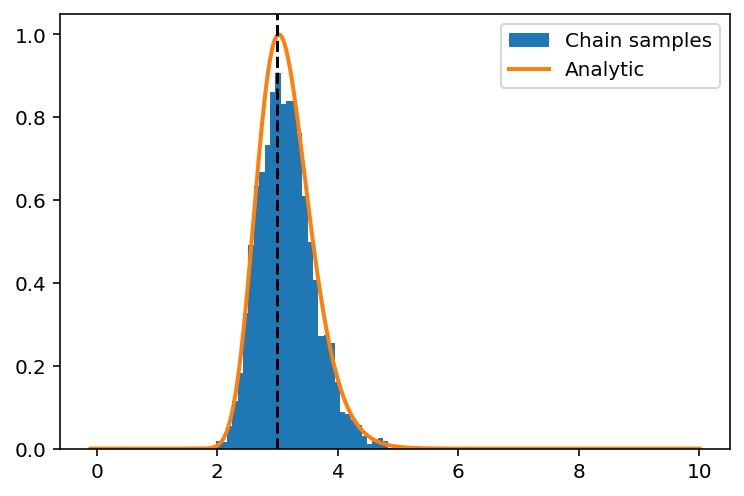

In [44]:
fig,ax = plt.subplots()

#ax.hist(mc.get_chain(), bins='fd', density=True)
a_grid = np.linspace(-.1, 10, 1000)

post = np.array([posterior(a,samples) for a in a_grid])

ax.hist(mc.get_chain(), bins=50, density=True, label="Chain samples")
ax.plot(a_grid, post/np.max(post), linewidth=2, label="Analytic")
ax.axvline(true_a, linestyle="dashed", color="k")
plt.legend()

plt.show()